# I.ingénierie des caractéristiques

In [1]:
import numpy as np
import pandas as pd

df = pd.read_excel('output_2024_06_01.xlsx')
df.head()
# 0 est incident, 1 est normal

,ICTRA_PK,ICTRA_USR,ICTRA_DATDEB,ICTRA_DATFIN,ICTRA_CODRET,ICTRA_PARAM1,ICTRA_PARAM2,ICTRA_PARAM3,ICTRA_DATDEBTRAPRE,ICTRA_COM,ICTRA_TYPE,ICTRA_PARAM4,ICTRA_PARAM5,ICTRA_PARAM6,ICTRA_PARAM7,y
0,344771,REPORT_FLUX,2024-07-24 00:05:13,2024-07-24 01:31:04,0.0,NaN,NaN,NaN,NaT,Fin normale du batch,40017,NaN,NaN,NaN,NaN,0
1,344559,REPORT_FLUX,2024-07-05 00:05:12,2024-07-05 01:30:28,0.0,NaN,NaN,NaN,NaT,Fin normale du batch,40017,NaN,NaN,NaN,NaN,0
2,344720,REPORT_FLUX,2024-07-17 00:05:13,2024-07-17 01:30:25,0.0,NaN,NaN,NaN,NaT,Fin normale du batch,40017,NaN,NaN,NaN,NaN,0
3,344792,REPORT_FLUX,2024-07-27 00:05:13,2024-07-27 01:29:51,0.0,NaN,NaN,NaN,NaT,Fin normale du batch,40017,NaN,NaN,NaN,NaN,0
4,344733,REPORT_FLUX,2024-07-18 00:05:15,2024-07-18 01:29:02,0.0,NaN,NaN,NaN,NaT,Fin normale du batch,40017,NaN,NaN,NaN,NaN,0


## A. Explorer les caractéristiques des données

### A.1 Équilibre des données

In [2]:
rate = round(df["y"].mean() * 100, 2) #round est une fonction qui permet d'arrondir un nombre à un nombre de décimales donné
print(f"Taux de déséquilibre du dataset = {rate}%")
# 97.92% des données sont normales, 2.08% sont des incidents

Taux de déséquilibre du dataset = 97.92%


In [3]:
# Compter le nombre d'incidents et de données normales
counts = df['y'].value_counts()
print(counts)


y
1    7473
0     159
Name: count, dtype: int64


In [4]:
df.describe()

,ICTRA_PK,ICTRA_DATDEB,ICTRA_DATFIN,ICTRA_CODRET,ICTRA_DATDEBTRAPRE,ICTRA_TYPE,y
count,7632.000000,7632,7589,7590.000000,22,7632.000000,7632.000000
mean,343039.399633,2024-07-22 00:19:10.325340672,2024-07-21 11:40:08.079720448,0.408300,2024-02-26 16:21:49.090909184,40006.159591,0.979167
min,339223.000000,2024-06-01 00:05:17,2024-06-01 01:01:47,-1.000000,2020-12-02 00:00:00,40001.000000,0.000000
25%,341130.750000,2024-06-08 12:31:21.750000128,2024-06-08 11:31:21,0.000000,2024-07-27 12:00:00,40002.000000,1.000000
50%,343038.500000,2024-06-16 02:31:31,2024-06-16 01:31:22,0.000000,2024-10-08 00:00:00,40002.000000,1.000000
75%,344949.250000,2024-08-12 20:00:48.249999872,2024-08-09 07:12:13,0.000000,2024-10-21 18:00:00,40011.000000,1.000000
max,346857.000000,2025-02-11 10:49:36,2025-02-11 10:52:17,99.000000,2024-10-22 00:00:00,40025.000000,1.000000
std,2204.404097,NaN,NaN,6.314794,NaN,7.105765,0.142835


### A.2 Explorer les types de données

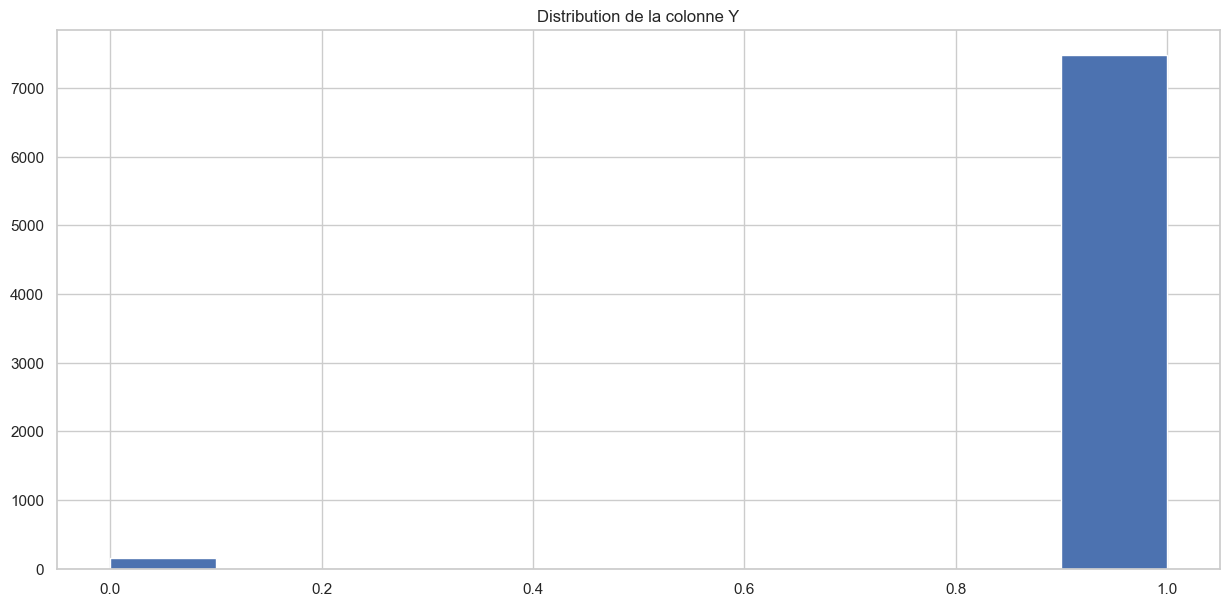

ICTRA_PK                       int64
ICTRA_USR                     object
ICTRA_DATDEB          datetime64[ns]
ICTRA_DATFIN          datetime64[ns]
ICTRA_CODRET                 float64
ICTRA_PARAM1                  object
ICTRA_PARAM2                  object
ICTRA_PARAM3                  object
ICTRA_DATDEBTRAPRE    datetime64[ns]
ICTRA_COM                     object
ICTRA_TYPE                     int64
ICTRA_PARAM4                  object
ICTRA_PARAM5                  object
ICTRA_PARAM6                  object
ICTRA_PARAM7                  object
y                              int64
dtype: object


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")

def plot_column(df, column, figsize=(15, 7)):
    plt.figure(figsize=figsize)
    plt.hist(df[column])
    plt.title("Distribution de la colonne %s" % column.capitalize())
    plt.show()

plot_column(df, "y")


# voir le type de chaque colonne
print(df.dtypes)




### A.3 Exploration des valeurs NAN dans les données

In [6]:
nan_percentage = df.isnull().mean() * 100
print(nan_percentage)

ICTRA_PK               0.000000
ICTRA_USR              0.013103
ICTRA_DATDEB           0.000000
ICTRA_DATFIN           0.563417
ICTRA_CODRET           0.550314
ICTRA_PARAM1          18.212788
ICTRA_PARAM2          96.409853
ICTRA_PARAM3          94.994759
ICTRA_DATDEBTRAPRE    99.711740
ICTRA_COM              0.563417
ICTRA_TYPE             0.000000
ICTRA_PARAM4          20.427149
ICTRA_PARAM5          55.673480
ICTRA_PARAM6          55.673480
ICTRA_PARAM7          55.673480
y                      0.000000
dtype: float64


## B. Traitement des données
Modification des exigences de certaines colonnes (les valeurs des caractéristiques de certaines colonnes varient en fonction des différents ICTRA_USR).

### B.1 Ajout de colonnes supplémentaires

In [7]:
# Convertir les colonnes de temps en type datetime
df["ICTRA_DATDEB"] = pd.to_datetime(df["ICTRA_DATDEB"])
df["ICTRA_DATFIN"] = pd.to_datetime(df["ICTRA_DATFIN"])

# calculer la durée d'exécution (secondes)
df["execution_duration"] = (df["ICTRA_DATFIN"] - df["ICTRA_DATDEB"]).dt.total_seconds()

# extraire les caractéristiques temporelles (heure, jour de la semaine, mois)
df["start_hour"] = df["ICTRA_DATDEB"].dt.hour
df["start_weekday"] = df["ICTRA_DATDEB"].dt.weekday
df["start_month"] = df["ICTRA_DATDEB"].dt.month

# vérifier est-ce que l'heure de début est comprise entre 8 et 17
df["is_working_hours"] = df["start_hour"].apply(lambda x: 1 if 8 <= x <= 17 else 0)

# vérifier est-ce que le jour de début est un weekend
df["is_weekend"] = df["start_weekday"].apply(lambda x: 1 if x in [5, 6] else 0)

print(df.head())




   ICTRA_PK    ICTRA_USR        ICTRA_DATDEB        ICTRA_DATFIN  \
0    344771  REPORT_FLUX 2024-07-24 00:05:13 2024-07-24 01:31:04   
1    344559  REPORT_FLUX 2024-07-05 00:05:12 2024-07-05 01:30:28   
2    344720  REPORT_FLUX 2024-07-17 00:05:13 2024-07-17 01:30:25   
3    344792  REPORT_FLUX 2024-07-27 00:05:13 2024-07-27 01:29:51   
4    344733  REPORT_FLUX 2024-07-18 00:05:15 2024-07-18 01:29:02   

   ICTRA_CODRET ICTRA_PARAM1 ICTRA_PARAM2 ICTRA_PARAM3 ICTRA_DATDEBTRAPRE  \
0           0.0          NaN          NaN          NaN                NaT   
1           0.0          NaN          NaN          NaN                NaT   
2           0.0          NaN          NaN          NaN                NaT   
3           0.0          NaN          NaN          NaN                NaT   
4           0.0          NaN          NaN          NaN                NaT   

              ICTRA_COM  ...  ICTRA_PARAM5 ICTRA_PARAM6 ICTRA_PARAM7  y  \
0  Fin normale du batch  ...           NaN          N

### B.2 Suppression des colonnes inutiles
Suppression de identifiant et des colonnes contenant plus de 90 % de valeurs NAN :

- ICTRA_PARAM2 96,41 %
- ICTRA_PARAM3 94,99 %
- ICTRA_DATDEBTRAPRE 99,71 %

In [8]:
# supprimer les colonnes inutiles
df.drop(columns=["ICTRA_PK"], inplace=True)
# supprimer les colonnes contenant trop de NAN
df.drop(columns=["ICTRA_DATDEBTRAPRE"], inplace=True)
df.drop(columns=["ICTRA_PARAM2"], inplace=True)
df.drop(columns=["ICTRA_PARAM3"], inplace=True)

In [9]:
# supprimer les colonnes de temps
df.drop(columns=["ICTRA_DATFIN"], inplace=True)
df.drop(columns=["ICTRA_DATDEB"], inplace=True)

### B.3 Traitement des variables Label

### B.3.1 Traitement de ICTRA_USR et ICTRA_TYPE

- Si ICTRA_USR est null et ICTRA_TYPE = 40001, alors ICTRA_USR = "40001".
- Si ICTRA_USR est null et ICTRA_TYPE = 40005, alors ICTRA_USR = "IMPORT_MT509".
- Si ICTRA_USR est null et ICTRA_TYPE = 40007, alors ICTRA_USR = "CRTR".

In [10]:
# Traitement des valeurs NAN dans ICTRA_USR
df.loc[(df["ICTRA_USR"].isna()) & (df["ICTRA_TYPE"] == 40001), "ICTRA_USR"] = "40001"
df.loc[(df["ICTRA_USR"].isna()) & (df["ICTRA_TYPE"] == 40005), "ICTRA_USR"] = "IMPORT_MT509"
df.loc[(df["ICTRA_USR"].isna()) & (df["ICTRA_TYPE"] == 40007), "ICTRA_USR"] = "CRTR"

In [11]:
# Détection de la relation entre ICTRA_USR et la variable y

print(df.groupby("ICTRA_USR")["y"].mean().sort_values())

ICTRA_USR
GOST_IMPORT_ENCOURS     0.200000
IMPORT_CARAC            0.294118
IMP_POS_MT              0.378049
REPORT_FLUX             0.759843
GOST_IMPORT_OST         0.829787
IMPORT_FONDS            0.857143
EXPORT_FONDS            0.894737
IMP_ASSOC               0.925926
IMPORT_FLUX             0.962963
VALID_AUTO              0.976608
IMPORT_MT509            0.982143
IMP_PRODUIT             0.987047
EXPORT_ORDRE            0.994318
exportOrdreValide       0.995833
DEVERSEMENT             0.999809
exportGB2000FondsIFI    1.000000
IMPORT_TAUXR            1.000000
IMP_POS_SG              1.000000
40001                   1.000000
ICO31J                  1.000000
EXPORT_EMETT            1.000000
EXPORT_DEVIS            1.000000
EXPORT_COUFO            1.000000
CRTR                    1.000000
CALCUL_SHORT            1.000000
CALCUL_PERF             1.000000
BATCH_ARCHIVAGE_FLUX    1.000000
IMPORT_GFIN             1.000000
exportPRIIPS            1.000000
Name: y, dtype: float64


#### Utilisation de l’encodage par cible (Target Encoding) pour ICTRA_USR
- Étant donné que ICTRA_USR est fortement corrélé avec la variable cible y

In [12]:
#Target Encoding
df["ICTRA_USR_target_mean"] = df.groupby("ICTRA_USR")["y"].transform("mean")


In [13]:
# Supprimer la colonne ICTRA_Type
# Après l'encodage par cible de ICTRA_USR, la colonne ICTRA_TYPE devient redondante et est supprimée du jeu de données afin d'éviter la multicolinéarité et d'optimiser les performances du modèle.
df.drop(columns=["ICTRA_TYPE"], inplace=True)

#### B.3.2 Traitement de PARAM1
#### Les différentes formes de données dans PARAM1 :

- Numéro de lot (Batch ID) : Identifiant associé à Deversement.
- Date : Valeurs de type date.
- Répertoire (Chemin de fichier ou dossier).
- Logiciel spécifique : Peut prendre les valeurs "Epargner", "GBPROD", "GB2000", "SOLIFE", "FONDSALL", "HISTO".

In [14]:
from sklearn.preprocessing import LabelEncoder# 填充缺失值（先填充 "unknown" 以避免报错）
df["ICTRA_PARAM1"].fillna("unknown", inplace=True)

# suopprimer les valeurs inutiles
df = df[~df["ICTRA_PARAM1"].isin(["202407300533_RapproAO.csv", "Import Avis Operes"])]

# uniformiser le format de la date
df["ICTRA_PARAM1_date"] = pd.to_datetime(df["ICTRA_PARAM1"], errors="coerce")

# traitements de type des données
df["ICTRA_PARAM1_sous_type"] = df["ICTRA_PARAM1"].astype(str).apply(lambda x: int(x) if x in ["0", "1", "2", "3", "4", "5"] else None)
df["ICTRA_PARAM1_other_num"] = df["ICTRA_PARAM1"].astype(str).apply(lambda x: int(x) if x.isdigit() and x not in ["0", "1", "2", "3", "4", "5"] else None)

# traitement de chemins de fichiers
df["ICTRA_PARAM1_is_path"] = df["ICTRA_PARAM1"].astype(str).apply(lambda x: 1 if x.startswith("/data/") else 0)

# traitement de FONDS_INCONNU
df["ICTRA_PARAM1_is_fonds_inconnu"] = (df["ICTRA_PARAM1"] == "FONDS_INCONNU").astype(int)
df.loc[df["ICTRA_USR"] == "IMPORT_FONDS", "ICTRA_PARAM1"] = "unknown"

# Label Encoding
le = LabelEncoder()
df["ICTRA_PARAM1_encoded"] = le.fit_transform(df["ICTRA_PARAM1"].astype(str))

# Montrer les colonnes traitées
print(df[["ICTRA_PARAM1_encoded","ICTRA_PARAM1_sous_type", "ICTRA_PARAM1_other_num", "ICTRA_PARAM1_date", "ICTRA_PARAM1_is_path"]].head())






   ICTRA_PARAM1_encoded  ICTRA_PARAM1_sous_type  ICTRA_PARAM1_other_num  \
0                   204                     NaN                     NaN   
1                   204                     NaN                     NaN   
2                   204                     NaN                     NaN   
3                   204                     NaN                     NaN   
4                   204                     NaN                     NaN   

  ICTRA_PARAM1_date  ICTRA_PARAM1_is_path  
0               NaT                     0  
1               NaT                     0  
2               NaT                     0  
3               NaT                     0  
4               NaT                     0  


/var/folders/b4/6b5cdwqx3qd94p_4bdv167zm0000gn/T/ipykernel_30768/3769907349.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["ICTRA_PARAM1_date"] = pd.to_datetime(df["ICTRA_PARAM1"], errors="coerce")


In [15]:
df.drop(columns=["ICTRA_USR"], inplace=True)

In [16]:
#supprimer les colonnes inutiles
df.drop(columns=["ICTRA_PARAM1"], inplace=True)

#### B.3.3 Traitement de ICTRA_COM

In [17]:
df["ICTRA_COM"].fillna("unknown", inplace=True)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Target Encoding
df["ICTRA_COM_target_mean"] = df.groupby("ICTRA_COM")["y"].transform("mean")

# extraire les mots clés
df["ICTRA_COM_has_file"] = df["ICTRA_COM"].apply(lambda x: 1 if "fichier" in x.lower() else 0)
df["ICTRA_COM_has_error"] = df["ICTRA_COM"].apply(lambda x: 1 if "erreur" in x.lower() else 0)
df["ICTRA_COM_has_export"] = df["ICTRA_COM"].apply(lambda x: 1 if "export" in x.lower() else 0)
df["ICTRA_COM_has_batch"] = df["ICTRA_COM"].apply(lambda x: 1 if "batch" in x.lower() else 0)
df["ICTRA_COM_has_rejet"] = df["ICTRA_COM"].apply(lambda x: 1 if "rejet" in x.lower() else 0)

# traitement TF-IDF
vectorizer = TfidfVectorizer(max_features=50)
X_tfidf = vectorizer.fit_transform(df["ICTRA_COM"].astype(str))
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
df = pd.concat([df, df_tfidf], axis=1)

In [19]:
#Suppression de la colonne ICTRA_COM
# Étant donné que ICTRA_COM a été converti en une caractéristique numérique, la colonne texte d'origine devient redondante 
df.drop(columns=["ICTRA_COM"], inplace=True)

In [20]:
# Vérifier les données du tableau actuel
# Enregistrer dans le fichier Excel correspondant
# Définir le chemin du fichier de sortie
# Sauvegarder dans Excel
#output_file_path = "processed_output.xlsx"
#df.to_excel(output_file_path, index=False)

#print(f"les données traitées est dans {output_file_path}")

#### B.3.4 Traitement de PARAM4


In [21]:
from sklearn.preprocessing import StandardScaler
# traitement de NaN
df["ICTRA_PARAM4"].fillna("unknown", inplace=True)

# extraire les donées de `Flux à traiter X` 
df["flux_count"] = df["ICTRA_PARAM4"].str.extract(r'Flux à traiter (\d+)').astype(float)

# extraire `Nb de ligne Lu: X Ecrite: Y`
df["lines_read"] = df["ICTRA_PARAM4"].str.extract(r'Nb de ligne Lu: (\d+)').astype(float)
df["lines_written"] = df["ICTRA_PARAM4"].str.extract(r'Ecrite: (\d+)').astype(float)

# extraire `Export terminé : X lignes récupérées`
df["lines_exported"] = df["ICTRA_PARAM4"].str.extract(r'Export terminé : (\d+)').astype(float)

# extraire `Aucun fichier trouvé`
df["no_data"] = df["ICTRA_PARAM4"].apply(lambda x: 1 if "aucun" in x.lower() else 0)

# traitement de NaN (remplir 0)
df.fillna(0, inplace=True)

# standardisation
scaler = StandardScaler()
df[["flux_count", "lines_read", "lines_written", "lines_exported"]] = scaler.fit_transform(
    df[["flux_count", "lines_read", "lines_written", "lines_exported"]])

# supprimer la colonne ICTRA_PARAM4
df.drop(columns=["ICTRA_PARAM4"], inplace=True)

#### B.3.5 Traitement de PARAM5

In [22]:
# traitement de NaN
df["ICTRA_PARAM5_missing"] = df["ICTRA_PARAM5"].isna().astype(int)  # 创建缺失值指示变量
df["ICTRA_PARAM5"].fillna("unknown", inplace=True)  # 先填充 "unknown"

# extraire `Flux traités X` 
df["flux_count"] = df["ICTRA_PARAM5"].str.extract(r'Flux traités (\d+)').astype(float)

# traiter `202407300533_RapproAO_rejet.csv`（cas spéciale）
df["ICTRA_PARAM5_is_reject_file"] = df["ICTRA_PARAM5"].apply(lambda x: 1 if "rejet.csv" in str(x).lower() else 0)

# remplir les valeurs manquantes avec la médiane
df["flux_count"].fillna(df["flux_count"].median(), inplace=True)

# Standardisation
scaler = StandardScaler()
df[["flux_count"]] = scaler.fit_transform(df[["flux_count"]])

# supprimer `ICTRA_PARAM5`
df.drop(columns=["ICTRA_PARAM5"], inplace=True)

#### B.3.6 Traitement de PARAM6

In [23]:
from sklearn.preprocessing import StandardScaler

# traitement de NaN 
df["ICTRA_PARAM6_missing"] = df["ICTRA_PARAM6"].isna().astype(int)  # 创建缺失值指示变量
df["ICTRA_PARAM6"].fillna("unknown", inplace=True)  # 填充 "unknown"

# extraire `Flux intégrés X` 
df["flux_integrated"] = df["ICTRA_PARAM6"].str.extract(r'Flux intégrés (\d+)').astype(float)

# extraire `Nb Lignes KO : X` 
df["nb_lignes_ko"] = df["ICTRA_PARAM6"].str.extract(r'Nb Lignes KO : (\d+)').astype(float)

df.loc[df["ICTRA_PARAM6"] == "1365", "nb_lignes_ko"] = 1365

# remplir NaN（utiliser le médian）
df["flux_integrated"].fillna(df["flux_integrated"].median(), inplace=True)
df["nb_lignes_ko"].fillna(df["nb_lignes_ko"].median(), inplace=True)

# standardisation
scaler = StandardScaler()
df[["flux_integrated", "nb_lignes_ko"]] = scaler.fit_transform(df[["flux_integrated", "nb_lignes_ko"]])

# supprimer `ICTRA_PARAM6`
df.drop(columns=["ICTRA_PARAM6"], inplace=True)


/Library/Python/3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/yangyang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/yangyang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/yangyang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


#### B.3.7 Traitement de ICTRA_PARAM7

In [24]:
# Traitement de NaN 
df["ICTRA_PARAM7_missing"] = df["ICTRA_PARAM7"].isna().astype(int)  # 创建缺失值指示变量
df["ICTRA_PARAM7"].fillna("unknown", inplace=True)  # 填充 "unknown"

# extraire `Flux rejetés X` 
df["flux_rejected"] = df["ICTRA_PARAM7"].str.extract(r'Flux rejetés\s*:\s*(\d+)').astype(float)

# extraire `Flux filtrés X` 
df["flux_filtered"] = df["ICTRA_PARAM7"].str.extract(r'Flux filtrés\s*:\s*(\d+)').astype(float)

# extraire `Nb Lignes Avertissement X` 
df["nb_avertissement"] = df["ICTRA_PARAM7"].str.extract(r'Nb Lignes Avertissement\s*:\s*(\d+)').astype(float)

# traitement de NaN（remplir avec la médiane）
df["flux_rejected"].fillna(df["flux_rejected"].median(), inplace=True)
df["flux_filtered"].fillna(df["flux_filtered"].median(), inplace=True)
df["nb_avertissement"].fillna(df["nb_avertissement"].median(), inplace=True)

# standardisation
scaler = StandardScaler()
df[["flux_rejected", "flux_filtered", "nb_avertissement"]] = scaler.fit_transform(df[["flux_rejected", "flux_filtered", "nb_avertissement"]])

# supprimer `ICTRA_PARAM7`
df.drop(columns=["ICTRA_PARAM7"], inplace=True)


/Library/Python/3.9/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/yangyang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/yangyang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/yangyang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


## C. Détection des valeurs NAN après le nettoyage et génération des données

In [25]:
nan_percentage = df.isnull().mean() * 100
print(nan_percentage)

ICTRA_CODRET              0.0
y                         0.0
execution_duration        0.0
start_hour                0.0
start_weekday             0.0
                        ...  
nb_lignes_ko            100.0
ICTRA_PARAM7_missing      0.0
flux_rejected             0.0
flux_filtered             0.0
nb_avertissement        100.0
Length: 72, dtype: float64


In [26]:
# nettoyer les colonnes générées par erreur
df.drop(columns=["nb_avertissement"], inplace=True)
df.drop(columns=["nb_lignes_ko"], inplace=True)

In [27]:
# Vérifier les données du tableau actuel
# Enregistrer dans le fichier Excel correspondant
# Définir le chemin du fichier de sortie
# Sauvegarder dans Excel
output_file_path = "cleaned_donnee.xlsx"
df.to_excel(output_file_path, index=False)

print(f"les données traitées est dans {output_file_path}")



les données traitées est dans cleaned_donnee.xlsx


In [28]:
# le nombre de colonnes après l'ingénierie des caractéristiques
print(len(df.columns))

70


In [29]:
df.drop(columns=["ICTRA_PARAM1_date"], inplace=True)

# D. Utilisation de la Régression Logistique

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# séparer les variables caractéristiques et cibles
X = df.drop(columns=["y"])  # variables caractéristiques
y = df["y"]  # variable cible

# séparer les données en ensembles d'entraînement et de test (80% d'entraînement, 20% de test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# entraîner le modèle de régression logistique
logreg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# prédire les données de test
y_pred = logreg.predict(X_test)

# Estimer la modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

results_df = pd.DataFrame({"Metric": ["Accuracy"], "Score": [accuracy]})
print(results_df)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print(classification_report(y_test, y_pred))


     Metric     Score
0  Accuracy  0.992796
[[  32    0]
 [  11 1484]]
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        32
         1.0       1.00      0.99      1.00      1495

    accuracy                           0.99      1527
   macro avg       0.87      1.00      0.92      1527
weighted avg       0.99      0.99      0.99      1527



/Users/yangyang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **Conclusion**

### **Précision (Precision)**
- **Classe 0.0 (incident/négative)** : **0.74** → Parmi les échantillons prédits comme 0, **74 % sont corrects**.
- **Classe 1.0 (normal/positive)** : **1.00** → Parmi les échantillons prédits comme 1, **100 % sont corrects**.
- **Interprétation** : La prédiction de **1** est plus précise que celle de **0**, sans faux normal(positifs).

### **Rappel (Recall)**
- **Classe 0.0** : **1.00** → Tous les échantillons réellement **0** sont correctement classés.
- **Classe 1.0** : **0.99** → **99 %** des échantillons réellement **1** sont correctement classés, avec **quelques erreurs de classification en 0 **.
- **Interprétation** : Le modèle a **très peu de erreurs** pour la classe **1**.

### **Score F1 (F1-score)**
Le **F1-score** est la moyenne harmonique entre la précision et le rappel :

$$ F1\text{-}score = 2 \times \frac{(\text{Precision} \times \text{Recall})}{(\text{Precision} + \text{Recall})} $$

### **Support (Effectif des classes)**
Le **support** correspond au **nombre d’échantillons par classe** :
- **Classe 0.0** : **32 échantillons**
- **Classe 1.0** : **1495 échantillons**


## **Conclusion générale**
 **Prédiction très précise pour la classe 1.0** (**1495 échantillons**) avec **Précision = 1.00**, **Recall = 0.99**, **F1-score = 1.00**.  
**Prédiction légèrement moins performante pour la classe 0.0** (**32 échantillons**) avec **Précision = 0.74**, **Recall = 1.00**, **F1-score = 0.85**
 **Exactitude globale (Accuracy) = 0.99 (99%)**, ce qui est excellent. **Toutefois, le déséquilibre des classes (0 sous-représenté) peut poser un problème**.
